# Tensorflow: Train your first neural network: basic classification

Link: https://www.tensorflow.org/tutorials/keras/basic_classification

In [2]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


Tập dữ liệu "*Fashion MNIST*" được chủ ý dùng để thay thế cho bộ dữ liệu MNIST kinh điển (vốn được coi là bài "Hello, World" trong việc học machine learning, chủ đề computer vision). The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [7]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##  Explore the data

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

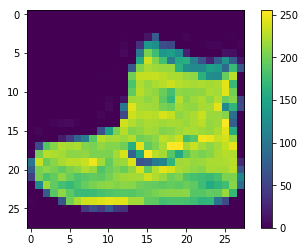

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

It's important that the training set and the testing set are preprocessed in the same way:

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

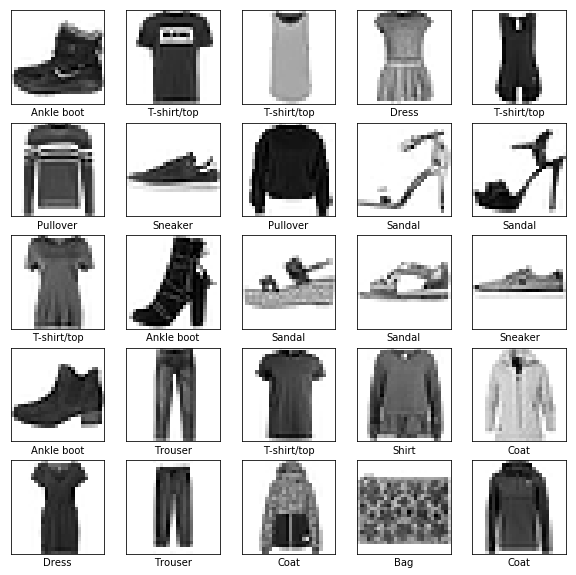

In [21]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

### Setup the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Layer thứ nhất trong mạng trên, **tf.keras.layers.Flatten**, giúp chuyển đổi định dạng của bức ảnh từ 2d-array (của 28 x 28 pixels), thành mảng 1d-array của 28 x 28 = 784 pixels. Hãy coi layer này như là việc duỗi các hàng của pixels trong bức ảnh, rồi xếp liền nhau. Layer này không có parameters nào phải học, chỉ có nhiệm vụ chuyển định dạng dữ liệu.

Sau khi các pixel được làm phẳng, mạng này chứa một chuỗi 2 layers thuộc dạng **tf.keras.layers.Dense**. Đặc tính của những layer này là: densely-connected, hoặc fully-connected, neural. Layer Dense đầu tiên có 128 nodes (hoặc neurons). Layer Dense thứ hai (và cuối cùng) là một layer 10-node softmax giúp trả về một mảng có 10 điểm xác suất có tổng bằng 1. Mỗi node chứa một score (điểm) biểu thị xác suất mà bức ảnh thuộc về một trong 10 class.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [23]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [24]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.4956 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3753 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3390 - acc: 0.8771
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3160 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2968 - acc: 0.8901


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy:  0.8697


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

## Make predictions

In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[0]

array([  1.95608621e-07,   4.83056262e-09,   4.90932450e-07,
         5.12089997e-08,   9.92934872e-08,   2.71240696e-02,
         3.31323645e-06,   2.51060724e-01,   1.25025748e-04,
         7.21686065e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

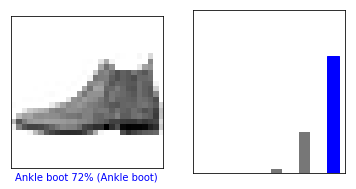

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

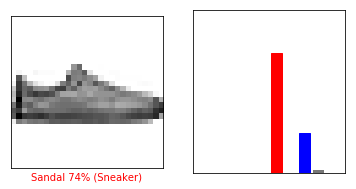

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

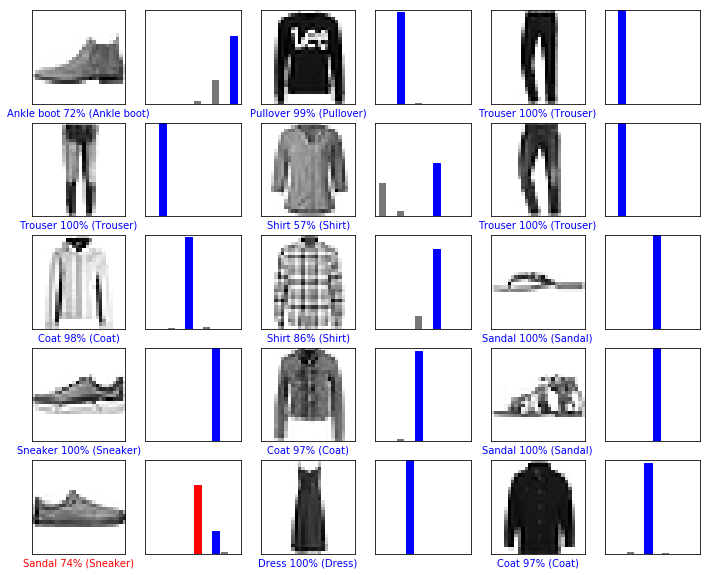

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [36]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [37]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

[[  1.95608209e-07   4.83056217e-09   4.90932393e-07   5.12089002e-08
    9.92932954e-08   2.71240808e-02   3.31323008e-06   2.51060784e-01
    1.25025515e-04   7.21686006e-01]]


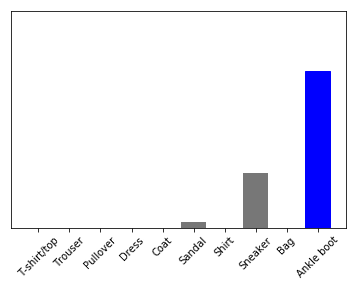

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9